### 4.9 Task Submission - Intro to Data Viz - part 2 - Kaggle

#### Part 2

Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In a markdown cell beneath your line chart, describe what the line chart shows.
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Export your visualizations as “.png” files in your relevant project folder.

Save your notebook from part 2 of this Exercise’s task.

Submit your notebooks for both the first and second parts of this task to your tutor for review.

#### importing libraries and files:



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import polars as pl

In [2]:
path = "/kaggle/input/instacart/"

In [3]:
# import parquet file with polars to save RAM:
ords_prods_custs = pl.read_parquet(os.path.join(path, 'ords_prods_custs_merge.parquet'))

In [4]:
ords_prods_custs.shape

(32404859, 32)

In [5]:
# lets create a random subset of a million rows using polars, which saves RAM:
subset = ords_prods_custs.sample(n=1_000_000, seed=42)

Checking how the subset is looking:

In [6]:
subset.shape

(1000000, 32)

In [7]:
subset.head()

order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,orders_affluence,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_ord_freq,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
i64,i64,i64,i64,i64,f64,i64,i64,i64,str,i64,i64,f64,str,str,str,str,i64,str,f64,str,f64,str,str,str,str,str,i64,str,i64,str,i64
221517,32854,3,1,11,17.0,23909,5,1,"""2% Reduced Fat Milk""",84,16,9.2,"""Mid-range product""","""Regularly busy""","""Busiest days""","""Most orders""",5,"""New customer""",7.912766,"""Low Spender""",17.0,"""Regular customer""","""Gerald""","""Joseph""","""Male""","""Florida""",80,"""10/15/2018""",1,"""married""",116151
34953,62732,7,2,12,18.0,10246,17,1,"""Organic Celery Hearts""",83,4,4.5,"""Low-range product""","""Regularly busy""","""Regularly busy""","""Most orders""",30,"""Regular customer""",7.037897,"""Low Spender""",7.0,"""Frequent customer""","""Teresa""","""Maynard""","""Female""","""Alaska""",55,"""1/9/2018""",3,"""married""",142370
1167715,60809,10,0,15,6.0,12341,4,1,"""Hass Avocados""",32,4,9.1,"""Mid-range product""","""Busiest day""","""Busiest days""","""Most orders""",11,"""Regular customer""",7.42027,"""Low Spender""",15.0,"""Regular customer""",null,"""Avery""","""Male""","""Kansas""",29,"""4/28/2017""",1,"""married""",84718
3288224,150105,61,2,18,6.0,10749,7,1,"""Organic Red Bell Pepper""",83,4,5.7,"""Mid-range product""","""Regularly busy""","""Regularly busy""","""Average orders""",63,"""Loyal customer""",8.451866,"""Low Spender""",6.0,"""Frequent customer""","""Virginia""","""Mccormick""","""Female""","""Hawaii""",56,"""10/21/2019""",3,"""married""",160723
365104,110644,32,3,13,4.0,35018,6,0,"""Coldcalm Homeopathic Tablets""",11,11,13.5,"""Mid-range product""","""Regularly busy""","""Least busy days""","""Most orders""",53,"""Loyal customer""",7.475906,"""Low Spender""",7.0,"""Frequent customer""","""Gregory""","""Richard""","""Male""","""New Jersey""",39,"""10/25/2018""",0,"""single""",72025


### It's looking good. 
#### I'll proceed with my analysis using this subset, since the dataset goes beyond 32 million rows and there are RAM constrictions. 
#### Lets export it, so it's easier to use in the future, and lets convert it to pandas, so it's possible to plot it:

In [ ]:
subset.write_parquet("/kaggle/working/instacart_subset_1M.parquet")

In [9]:
subset_pd = subset.to_pandas()

### Question: 
#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

### Creating Bar Charts

<Axes: xlabel='order_hour_of_day'>

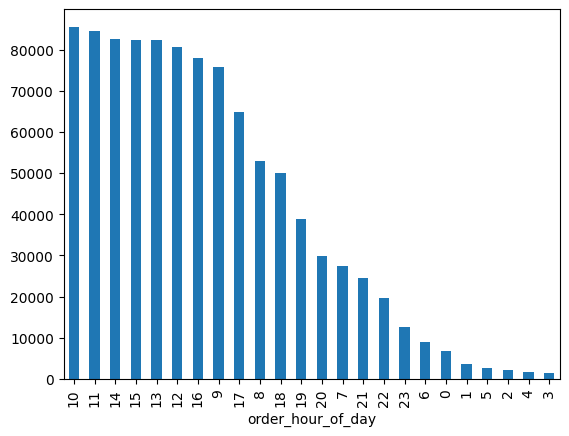

In [10]:
# let's leave this one here, unaltered. This isn't a histogram, which is what's requested, but a bar chart.
subset_pd['order_hour_of_day'].value_counts().plot.bar()

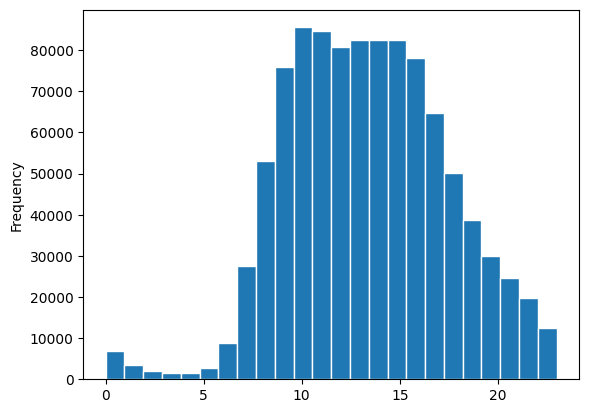

In [11]:
# making the histogram of 'order_hour_of_day':
hist = subset_pd['order_hour_of_day'].plot.hist(bins = 24, edgecolor = 'white')

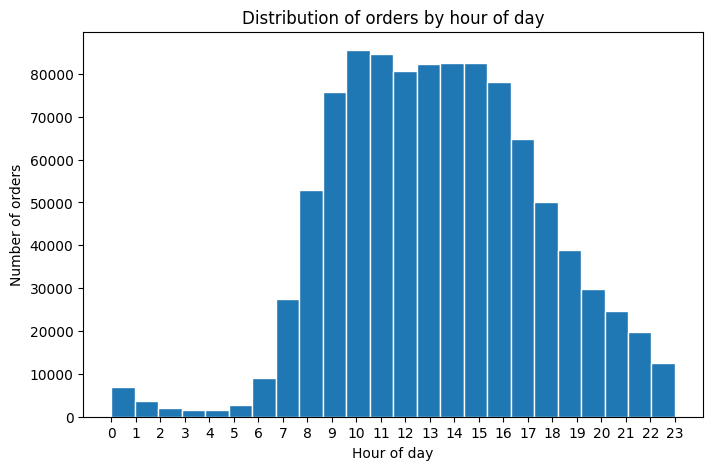

In [25]:
#upgrading this plot:
hist = subset_pd['order_hour_of_day'].plot.hist(
    bins = 24, edgecolor = 'white', figsize = (8,5))
#set the x-axis to show all 24h:
plt.xticks(range(0,24)) #from 0 to 24; centers the tick labels
#adding titles and labels:
plt.title('Distribution of orders by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Number of orders')

plt.show()

#### Commentary:

The histogram shows that the most popular hour to do orders are 10 and 11 in the morning, followed by 1, 2 and 3 in the afternoon, being high from 9am to 6pm.

The least popular hours are between midnight and 6 in the morning, being of low activity also from 7pm to 8am.

#### how can I label the x axis properly?
I've tried something but it isn't still as I'd like it.

### Question:
#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0, 0.5, 'Expenditure')

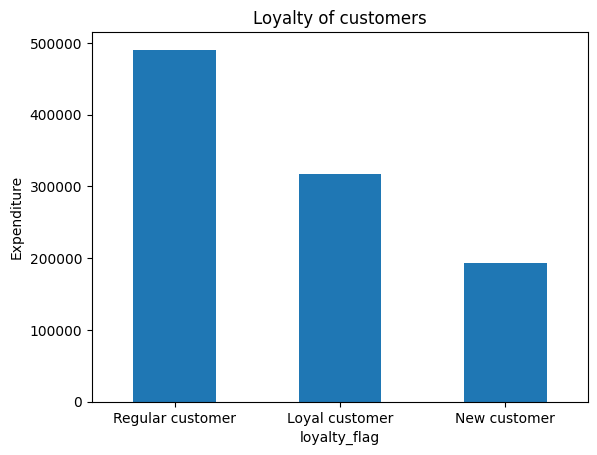

In [41]:
bar = subset_pd['loyalty_flag'].value_counts().plot.bar()

#adding titles and labels:
plt.title('Loyalty of customers')
plt.xticks(rotation=0)
plt.ylabel('Expenditure')


### Question:
#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

#### Answer:
Being accurate in regards to this plot, that portrays the difference of expenditure (prices) throughout the day (orders_hour_of_day).
I could use the following code to generate a random sample that is much smaller than the dataset and representative of the whole of it, but... I'll skip it, because I don't have enough RAM for it. 
##### I'll stick with the random subset I have, leaving the code down here, in case I had enough RAM.

````python
# creating random samples through random.seed and random.rand
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs)) <= 0.7
# by creating 'dev' list, that holds true/false values to the test <= 0.7

````python
# splitting the dataframe into two samples:

# big stores 70% of the sample:
big = ords_prods_custs[dev]
# small stores 30% of the sample:
small = ords_prods_custs[~dev]

In [27]:
# creating a smaller dataset, with only the columns that interest for this case:
lineprep = subset[['order_hour_of_day','prices']]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


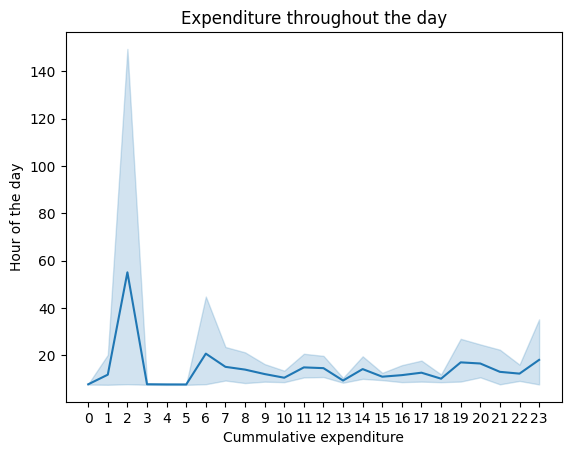

In [29]:
# finally, the line chart:
line1 = sns.lineplot(data = lineprep, x = 'order_hour_of_day',y = 'prices')
#set the x-axis to show all 24h:
plt.xticks(range(0,24)) #from 0 to 24; centers the tick labels
#adding titles and labels:
plt.title('Expenditure throughout the day')
plt.xlabel('Cummulative expenditure')
plt.ylabel('Hour of the day')

plt.show()

#### Commentary:

It seems the most expensive orders were done between midnight and 5am.

Could they be outliers?

### Question:
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [30]:
# creating another smaller dataset, with only the columns that interest for this case:
lineprep_2 = subset[['age','n_dependants']]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


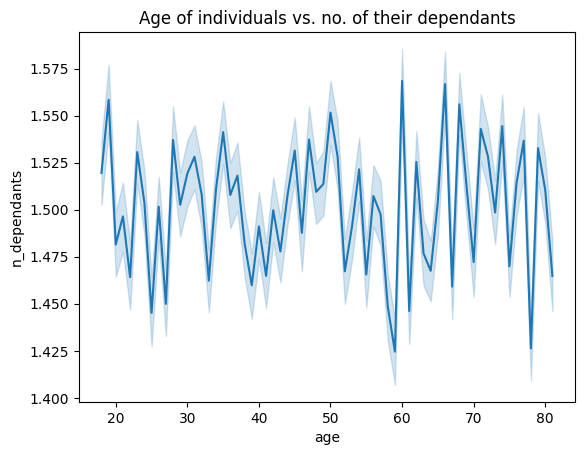

In [32]:
# another line chart to check what's the relation between age and the #dependants in families:
line2 = sns.lineplot(data = lineprep_2, x = 'age',y = 'n_dependants')

#adding titles and labels:
plt.title('Age of individuals vs. no. of their dependants')

plt.show()


#### Commentary:
The line chart shows the relation between age (x-axis) and the number of dependants of users (y-axis). From late teens to senior age the no of dependants varies around 1,5, meaning that users have, in general, 1 to 2 dependants.

There's no apparent upward or downward trend, suggesting that age doesn't have a strong relationship with the number of dependants in this dataset.

### Question:
In a markdown cell beneath your line chart, describe what the line chart shows. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0.5, 1.0, 'Age of individuals vs. their income')

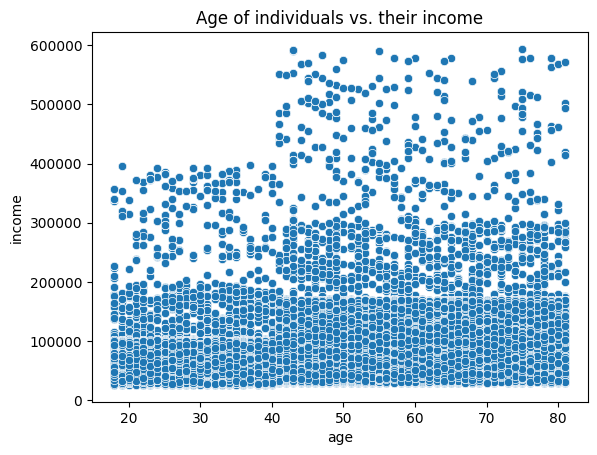

In [34]:
# working on a scatterplot to understand the relationships between age and spending power:
scattprep = subset[['age','income']]
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = scattprep)

#adding titles and labels:
plt.title('Age of individuals vs. their income')


#### Commentary:
The scatter plot shows:

there's a denser group below forty making 200,000 or less of income with a scattered/spread smaller group below forty making more than that, between 200,000 and 400,000;

For the over 40 there's also a denser group making 200,000 or less of income but also a considerably dense group making between 200,000 and 300,000 of income. There's a scattered/spread group making between 300,000 and 600,000.  

### Exporting the plots:


In [37]:
# exporting histogram
hist.figure.savefig('hist_order_hour_of_day.png')

In [42]:
# exporting bar chart
bar.figure.savefig('bar_loyalty_flag.png')

In [38]:
# exporting line chart
line1.figure.savefig('expenditure_throughout_day.png')

In [39]:
# exporting another line chart
line2.figure.savefig('age_and_family_size.png')

In [40]:
# exporting scatterplot
scatterplot.figure.savefig('age_and_spending_power.png')